In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np
import os 
for dirnames, _, files in os.walk('../Pedestrian_Count_Top_5_sensor_location/Datasets'):
    for f in files:
        print(os.path.join(dirnames,f))


../Pedestrian_Count_Top_5_sensor_location/Datasets/IndDepVar.csv
../Pedestrian_Count_Top_5_sensor_location/Datasets/Flinders_St-Spark_La.csv
../Pedestrian_Count_Top_5_sensor_location/Datasets/Collins_Place_North.csv
../Pedestrian_Count_Top_5_sensor_location/Datasets/Bourke_Street_Mall_South.csv
../Pedestrian_Count_Top_5_sensor_location/Datasets/Victoria_Point.csv
../Pedestrian_Count_Top_5_sensor_location/Datasets/Southern_Cross_Station.csv
../Pedestrian_Count_Top_5_sensor_location/Datasets/final_solar_exposure_dataset.csv


In [2]:
df = pd.read_csv('../Pedestrian_Count_Top_5_sensor_location/Datasets/IndDepVar.csv', parse_dates=['date_new'])
df = df.drop(columns = 'Unnamed: 0')
df['month'] = df['date_new'].dt.month
df['dayofweek']= df['date_new'].dt.dayofweek+1
df['dayofyear'] = df['date_new'].dt.dayofyear
df['year'] = df['date_new'].dt.year
df_data = df.iloc[:,[0,-1,-2,-3,-4,1,2,3,4,5,6,7]].copy()
df_data

,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount
0,2015-01-01,2015,1,4,1,1,13.3,26.9,23.600000,0.000,2592.0,2813.0
1,2015-01-02,2015,2,5,1,0,15.4,38.8,26.800000,0.000,1848.0,4648.0
2,2015-01-03,2015,3,6,1,0,20.0,38.2,26.500000,0.000,1451.0,1428.0
3,2015-01-04,2015,4,7,1,0,16.3,21.4,25.200000,4.200,1047.0,1347.0
4,2015-01-05,2015,5,1,1,0,15.0,22.0,30.700000,0.000,3416.0,11483.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,3.488,NaN,NaN
2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.768,NaN,NaN
2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,2.032,NaN,NaN
2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,0.320,NaN,NaN


In [4]:
df_data['date_new'] = df_data['date_new'].astype('str')
df = df_data.copy()
df

,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount
0,2015-01-01,2015,1,4,1,1,13.3,26.9,23.600000,0.000,2592.0,2813.0
1,2015-01-02,2015,2,5,1,0,15.4,38.8,26.800000,0.000,1848.0,4648.0
2,2015-01-03,2015,3,6,1,0,20.0,38.2,26.500000,0.000,1451.0,1428.0
3,2015-01-04,2015,4,7,1,0,16.3,21.4,25.200000,4.200,1047.0,1347.0
4,2015-01-05,2015,5,1,1,0,15.0,22.0,30.700000,0.000,3416.0,11483.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,3.488,NaN,NaN
2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.768,NaN,NaN
2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,2.032,NaN,NaN
2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,0.320,NaN,NaN


In [6]:

#check when is predicting-start day
df[df.date_new == '2021-03-01']


,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount
2251,2021-03-01,2021,60,1,3,0,13.8,21.7,17.500288,1.672,NaN,NaN


<ipython-input-7-db212c028fa1>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


<AxesSubplot:title={'center':'SoutherCrossCount'}, ylabel='Pedestrain Count'>

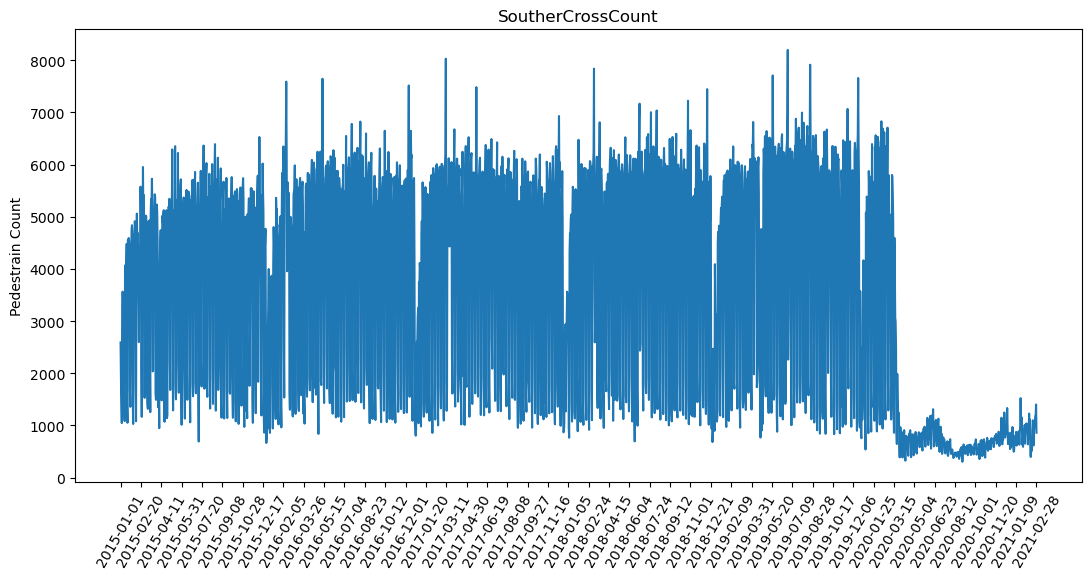

In [7]:
plt.figure(figsize=(13,6), dpi =100)
plt.plot(range(2251), df['SouthernCrossCount'][:2251])
ax = plt.subplot()
ax.set_xticks(range(0,2251,50))
ax.set_xticklabels(df['date_new'].loc[0:2251:50], rotation =60);
ax.set_title('SoutherCrossCount')

ax.set_ylabel('Pedestrain Count')
ax


<ipython-input-210-2afce74a2442>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


<AxesSubplot:title={'center':'VictoriaPointCount'}, ylabel='Pedestrain Count'>

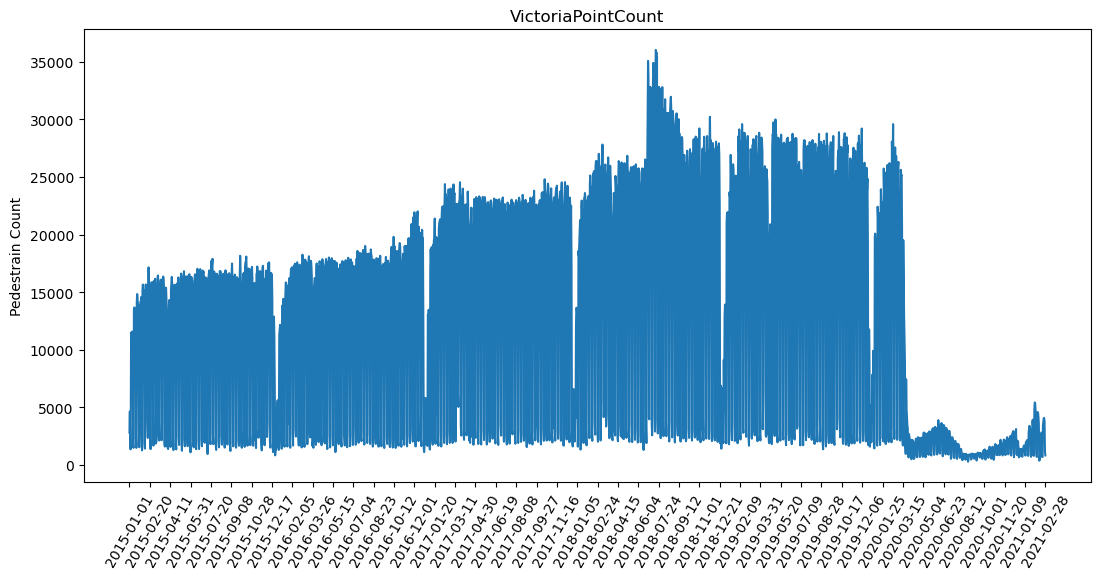

In [210]:
plt.figure(figsize=(13,6), dpi =100)
plt.plot(range(2251), df['VictoriaPointCount'][:2251])
ax = plt.subplot()
ax.set_xticks(range(0,2251,50))
ax.set_xticklabels(df['date_new'].loc[0:2251:50], rotation =60);
ax.set_title('VictoriaPointCount')

ax.set_ylabel('Pedestrain Count')
ax

In [9]:
X = df.iloc[:2251]

Y = df.iloc[2251:]

In [10]:
X

,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount
0,2015-01-01,2015,1,4,1,1,13.3,26.9,23.6,0.0,2592.0,2813.0
1,2015-01-02,2015,2,5,1,0,15.4,38.8,26.8,0.0,1848.0,4648.0
2,2015-01-03,2015,3,6,1,0,20.0,38.2,26.5,0.0,1451.0,1428.0
3,2015-01-04,2015,4,7,1,0,16.3,21.4,25.2,4.2,1047.0,1347.0
4,2015-01-05,2015,5,1,1,0,15.0,22.0,30.7,0.0,3416.0,11483.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2246,2021-02-24,2021,55,3,2,0,13.0,20.2,23.3,0.0,1056.0,4046.0
2247,2021-02-25,2021,56,4,2,0,11.3,24.3,18.9,0.0,1185.0,4086.0
2248,2021-02-26,2021,57,5,2,0,13.3,19.7,15.7,0.4,1194.0,3790.0
2249,2021-02-27,2021,58,6,2,0,11.3,18.6,11.8,0.0,1403.0,1194.0


In [11]:
print(X.shape)
print(Y.shape)


(2251, 12)
(184, 12)


## Southern Cross station prediction

In [15]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X.iloc[:,1:-2], X.iloc[:,-2], test_size=0.3, shuffle=False)

In [16]:
X_train

,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres)
0,2015,1,4,1,1,13.3,26.9,23.6,0.0
1,2015,2,5,1,0,15.4,38.8,26.8,0.0
2,2015,3,6,1,0,20.0,38.2,26.5,0.0
3,2015,4,7,1,0,16.3,21.4,25.2,4.2
4,2015,5,1,1,0,15.0,22.0,30.7,0.0
...,...,...,...,...,...,...,...,...,...
1570,2019,110,6,4,1,10.2,30.2,13.9,0.0
1571,2019,111,7,4,1,14.8,27.0,7.5,0.0
1572,2019,112,1,4,1,13.7,17.6,6.0,0.8
1573,2019,113,2,4,0,11.1,18.5,8.0,0.0


In [218]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1575, 8)
(1575,)
(676, 8)
(676,)


In [17]:
from sklearn.preprocessing import StandardScaler
#using standard scaler
scaler = StandardScaler()
#fit get the mean and standard deviation of the train features 
#while tranform applies the standardation formular
X_train_StandardScaler = scaler.fit_transform(X_train) 
X_train_StandardScaler
X_test_StandardScaler = scaler.fit_transform(X_test) 
X_test_StandardScaler

array([[-1.16467358, -0.71881297, -0.00443956, ...,  0.28670782,
        -0.52455671, -0.35007166],
       [-1.16467358, -0.70936502,  0.49575039, ..., -0.67737507,
        -0.98912057,  0.23549855],
       [-1.16467358, -0.69991707,  0.99594033, ..., -0.60972013,
        -0.78822809, -0.35007166],
       ...,
       [ 2.08871212, -1.26679413,  0.49575039, ..., -0.01773941,
         0.11578807, -0.27199563],
       [ 2.08871212, -1.25734618,  0.99594033, ..., -0.20379049,
        -0.37388735, -0.35007166],
       [ 2.08871212, -1.24789823,  1.49613027, ...,  1.16622204,
         1.07002734, -0.35007166]])

In [18]:
from sklearn.neighbors import KNeighborsRegressor
knn_max = KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, metric='chebyshev',
                    n_neighbors=25)
knn_max.fit(X_train_StandardScaler,y_train )

KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, metric='chebyshev',
                    n_neighbors=25)

In [19]:
predict_south= knn_max.predict(X_test_StandardScaler)


In [20]:
X_test

,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres)
1575,2019,115,4,4,1,10.2,21.5,10.6,0.0
1576,2019,116,5,4,0,11.9,15.8,6.9,3.0
1577,2019,117,6,4,0,8.7,16.2,8.5,0.0
1578,2019,118,7,4,0,12.4,17.4,5.2,0.0
1579,2019,119,1,4,0,11.5,18.1,8.4,0.0
...,...,...,...,...,...,...,...,...,...
2246,2021,55,3,2,0,13.0,20.2,23.3,0.0
2247,2021,56,4,2,0,11.3,24.3,18.9,0.0
2248,2021,57,5,2,0,13.3,19.7,15.7,0.4
2249,2021,58,6,2,0,11.3,18.6,11.8,0.0


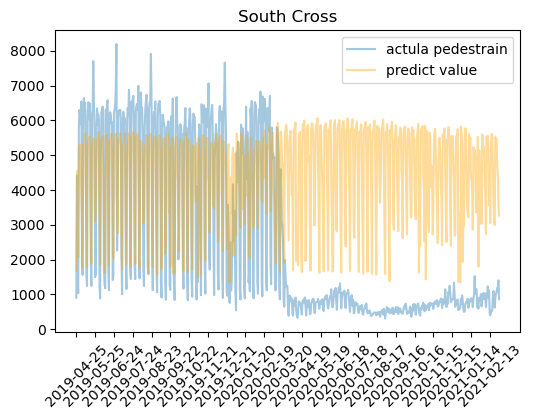

In [21]:
fig,ax = plt.subplots(dpi=100)
ax.plot(range(1575,2251),y_test, alpha =0.4)

ax.plot(range(1575,2251),predict_south, color = 'orange', alpha =0.4)

ax.set_xticks(range(1575,2251,30))
ax.set_xticklabels(X['date_new'].iloc[1575:2251:30], rotation =45);
ax.set_title('South Cross')
ax.legend(['actula pedestrain', 'predict value'])


In [22]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error, explained_variance_score, mean_absolute_percentage_error
predict_south
y_test
print(r2_score(y_test,predict_south,))
print(mean_absolute_error(y_test,predict_south))

-0.5561305852064902
2501.262721893491


In [227]:
Y.iloc[:,1:-2]

,month,dayofweek,dayofyear,year,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres)
2251,3,1,60,2021,13.8,21.7,17.500288,1.672
2252,3,2,61,2021,13.3,18.1,17.023478,0.184
2253,3,3,62,2021,14.2,17.7,16.966345,0.016
2254,3,4,63,2021,13.6,21.4,16.837059,1.024
2255,3,5,64,2021,15.0,18.0,16.607296,1.464
...,...,...,...,...,...,...,...,...
2430,8,5,239,2021,6.1,14.5,12.161574,3.488
2431,8,6,240,2021,8.8,20.7,12.163382,1.768
2432,8,7,241,2021,8.5,17.6,12.165101,2.032
2433,8,1,242,2021,9.2,19.3,12.166721,0.320


In [228]:
#prediction

south_test = scaler.fit_transform(Y.iloc[:,1:-2])
Y['south prediction']= knn_max.predict(south_test)




<ipython-input-228-789f5d4eca09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['south prediction']= knn_max.predict(south_test)


,date_new,month,dayofweek,dayofyear,year,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,south prediction
2251,2021-03-01,3,1,60,2021,13.8,21.7,17.500288,1.672,NaN,NaN,4790.04
2252,2021-03-02,3,2,61,2021,13.3,18.1,17.023478,0.184,NaN,NaN,4949.60
2253,2021-03-03,3,3,62,2021,14.2,17.7,16.966345,0.016,NaN,NaN,4377.84
2254,2021-03-04,3,4,63,2021,13.6,21.4,16.837059,1.024,NaN,NaN,4714.24
2255,2021-03-05,3,5,64,2021,15.0,18.0,16.607296,1.464,NaN,NaN,4197.24
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,8,5,239,2021,6.1,14.5,12.161574,3.488,NaN,NaN,3684.96
2431,2021-08-28,8,6,240,2021,8.8,20.7,12.163382,1.768,NaN,NaN,2502.52
2432,2021-08-29,8,7,241,2021,8.5,17.6,12.165101,2.032,NaN,NaN,2622.36
2433,2021-08-30,8,1,242,2021,9.2,19.3,12.166721,0.320,NaN,NaN,5788.96


## VIC

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
X.iloc[:,1:-2], X.iloc[:,-1], test_size=0.3, shuffle=False)

scaler = StandardScaler()

X_train_StandardScaler = scaler.fit_transform(X_train) 

X_test_StandardScaler = scaler.fit_transform(X_test) 


knn_max = KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, metric='chebyshev',
                    n_neighbors=25)
knn_max.fit(X_train_StandardScaler,y_train)

forecast_vic = knn_max.predict(X_test_StandardScaler)

Text(0.5, 1.0, 'VIC Station')

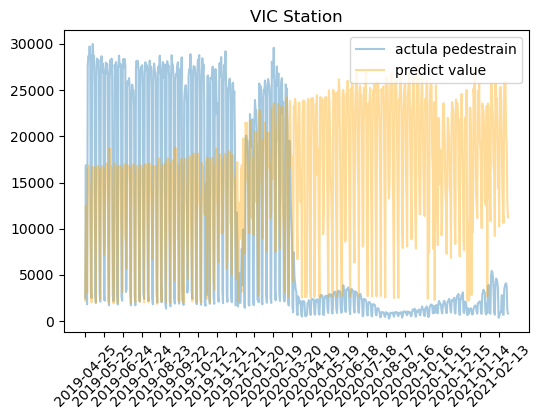

In [27]:
fig,ax = plt.subplots(dpi=100)
ax.plot(range(1575,2251),y_test, alpha =0.4)

ax.plot(range(1575,2251),forecast_vic, color = 'orange', alpha =0.4)

ax.set_xticks(range(1575,2251,30))
ax.set_xticklabels(X['date_new'].iloc[1575:2251:30], rotation =45);
ax.legend(['actula pedestrain', 'predict value'])
ax.set_title('VIC Station')

,month,dayofweek,dayofyear,year,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres)
2251,3,1,60,2021,13.8,21.7,17.500288,1.672
2252,3,2,61,2021,13.3,18.1,17.023478,0.184
2253,3,3,62,2021,14.2,17.7,16.966345,0.016
2254,3,4,63,2021,13.6,21.4,16.837059,1.024
2255,3,5,64,2021,15.0,18.0,16.607296,1.464
...,...,...,...,...,...,...,...,...
2430,8,5,239,2021,6.1,14.5,12.161574,3.488
2431,8,6,240,2021,8.8,20.7,12.163382,1.768
2432,8,7,241,2021,8.5,17.6,12.165101,2.032
2433,8,1,242,2021,9.2,19.3,12.166721,0.320


In [28]:
vic_test = scaler.fit_transform(Y.iloc[:,1:-3])
Y['vic prediction']= knn_max.predict(vic_test)

Y

<ipython-input-28-cc7bbd78ec48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['vic prediction']= knn_max.predict(vic_test)


,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,south prediction,vic prediction
2251,2021-03-01,2021,60,1,3,0,13.8,21.7,17.500288,1.672,NaN,NaN,5008.68,18103.48
2252,2021-03-02,2021,61,2,3,0,13.3,18.1,17.023478,0.184,NaN,NaN,5038.92,18358.44
2253,2021-03-03,2021,62,3,3,0,14.2,17.7,16.966345,0.016,NaN,NaN,4416.24,15591.52
2254,2021-03-04,2021,63,4,3,0,13.6,21.4,16.837059,1.024,NaN,NaN,4830.40,16549.96
2255,2021-03-05,2021,64,5,3,0,15.0,18.0,16.607296,1.464,NaN,NaN,4197.24,13773.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,3.488,NaN,NaN,3684.96,10948.40
2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.768,NaN,NaN,2502.52,6663.80
2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,2.032,NaN,NaN,2588.96,7713.12
2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,0.320,NaN,NaN,5795.28,22122.40


In [29]:
X['Class'] = 'actual'
X

<ipython-input-29-2736cb9a4730>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Class'] = 'actual'


,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,Class
0,2015-01-01,2015,1,4,1,1,13.3,26.9,23.6,0.0,2592.0,2813.0,actual
1,2015-01-02,2015,2,5,1,0,15.4,38.8,26.8,0.0,1848.0,4648.0,actual
2,2015-01-03,2015,3,6,1,0,20.0,38.2,26.5,0.0,1451.0,1428.0,actual
3,2015-01-04,2015,4,7,1,0,16.3,21.4,25.2,4.2,1047.0,1347.0,actual
4,2015-01-05,2015,5,1,1,0,15.0,22.0,30.7,0.0,3416.0,11483.0,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,2021-02-24,2021,55,3,2,0,13.0,20.2,23.3,0.0,1056.0,4046.0,actual
2247,2021-02-25,2021,56,4,2,0,11.3,24.3,18.9,0.0,1185.0,4086.0,actual
2248,2021-02-26,2021,57,5,2,0,13.3,19.7,15.7,0.4,1194.0,3790.0,actual
2249,2021-02-27,2021,58,6,2,0,11.3,18.6,11.8,0.0,1403.0,1194.0,actual


In [30]:
Y['Class'] = 'predict'
Y.drop(columns=['SouthernCrossCount','VictoriaPointCount'], inplace=True)
Y= Y.rename(columns={'south prediction':'SouthernCrossCount',
                    'vic prediction':'VictoriaPointCount'})
Y

<ipython-input-30-a5e827b2236b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Class'] = 'predict'
/Users/wuyoscar/opt/miniconda3/envs/py392/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,Class
2251,2021-03-01,2021,60,1,3,0,13.8,21.7,17.500288,1.672,5008.68,18103.48,predict
2252,2021-03-02,2021,61,2,3,0,13.3,18.1,17.023478,0.184,5038.92,18358.44,predict
2253,2021-03-03,2021,62,3,3,0,14.2,17.7,16.966345,0.016,4416.24,15591.52,predict
2254,2021-03-04,2021,63,4,3,0,13.6,21.4,16.837059,1.024,4830.40,16549.96,predict
2255,2021-03-05,2021,64,5,3,0,15.0,18.0,16.607296,1.464,4197.24,13773.64,predict
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,3.488,3684.96,10948.40,predict
2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.768,2502.52,6663.80,predict
2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,2.032,2588.96,7713.12,predict
2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,0.320,5795.28,22122.40,predict


In [31]:
result = pd.concat([X,Y])
result

,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,Class
0,2015-01-01,2015,1,4,1,1,13.3,26.9,23.600000,0.000,2592.00,2813.00,actual
1,2015-01-02,2015,2,5,1,0,15.4,38.8,26.800000,0.000,1848.00,4648.00,actual
2,2015-01-03,2015,3,6,1,0,20.0,38.2,26.500000,0.000,1451.00,1428.00,actual
3,2015-01-04,2015,4,7,1,0,16.3,21.4,25.200000,4.200,1047.00,1347.00,actual
4,2015-01-05,2015,5,1,1,0,15.0,22.0,30.700000,0.000,3416.00,11483.00,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,3.488,3684.96,10948.40,predict
2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.768,2502.52,6663.80,predict
2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,2.032,2588.96,7713.12,predict
2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,0.320,5795.28,22122.40,predict


In [32]:
result

,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,Class
0,2015-01-01,2015,1,4,1,1,13.3,26.9,23.600000,0.000,2592.00,2813.00,actual
1,2015-01-02,2015,2,5,1,0,15.4,38.8,26.800000,0.000,1848.00,4648.00,actual
2,2015-01-03,2015,3,6,1,0,20.0,38.2,26.500000,0.000,1451.00,1428.00,actual
3,2015-01-04,2015,4,7,1,0,16.3,21.4,25.200000,4.200,1047.00,1347.00,actual
4,2015-01-05,2015,5,1,1,0,15.0,22.0,30.700000,0.000,3416.00,11483.00,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,3.488,3684.96,10948.40,predict
2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.768,2502.52,6663.80,predict
2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,2.032,2588.96,7713.12,predict
2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,0.320,5795.28,22122.40,predict


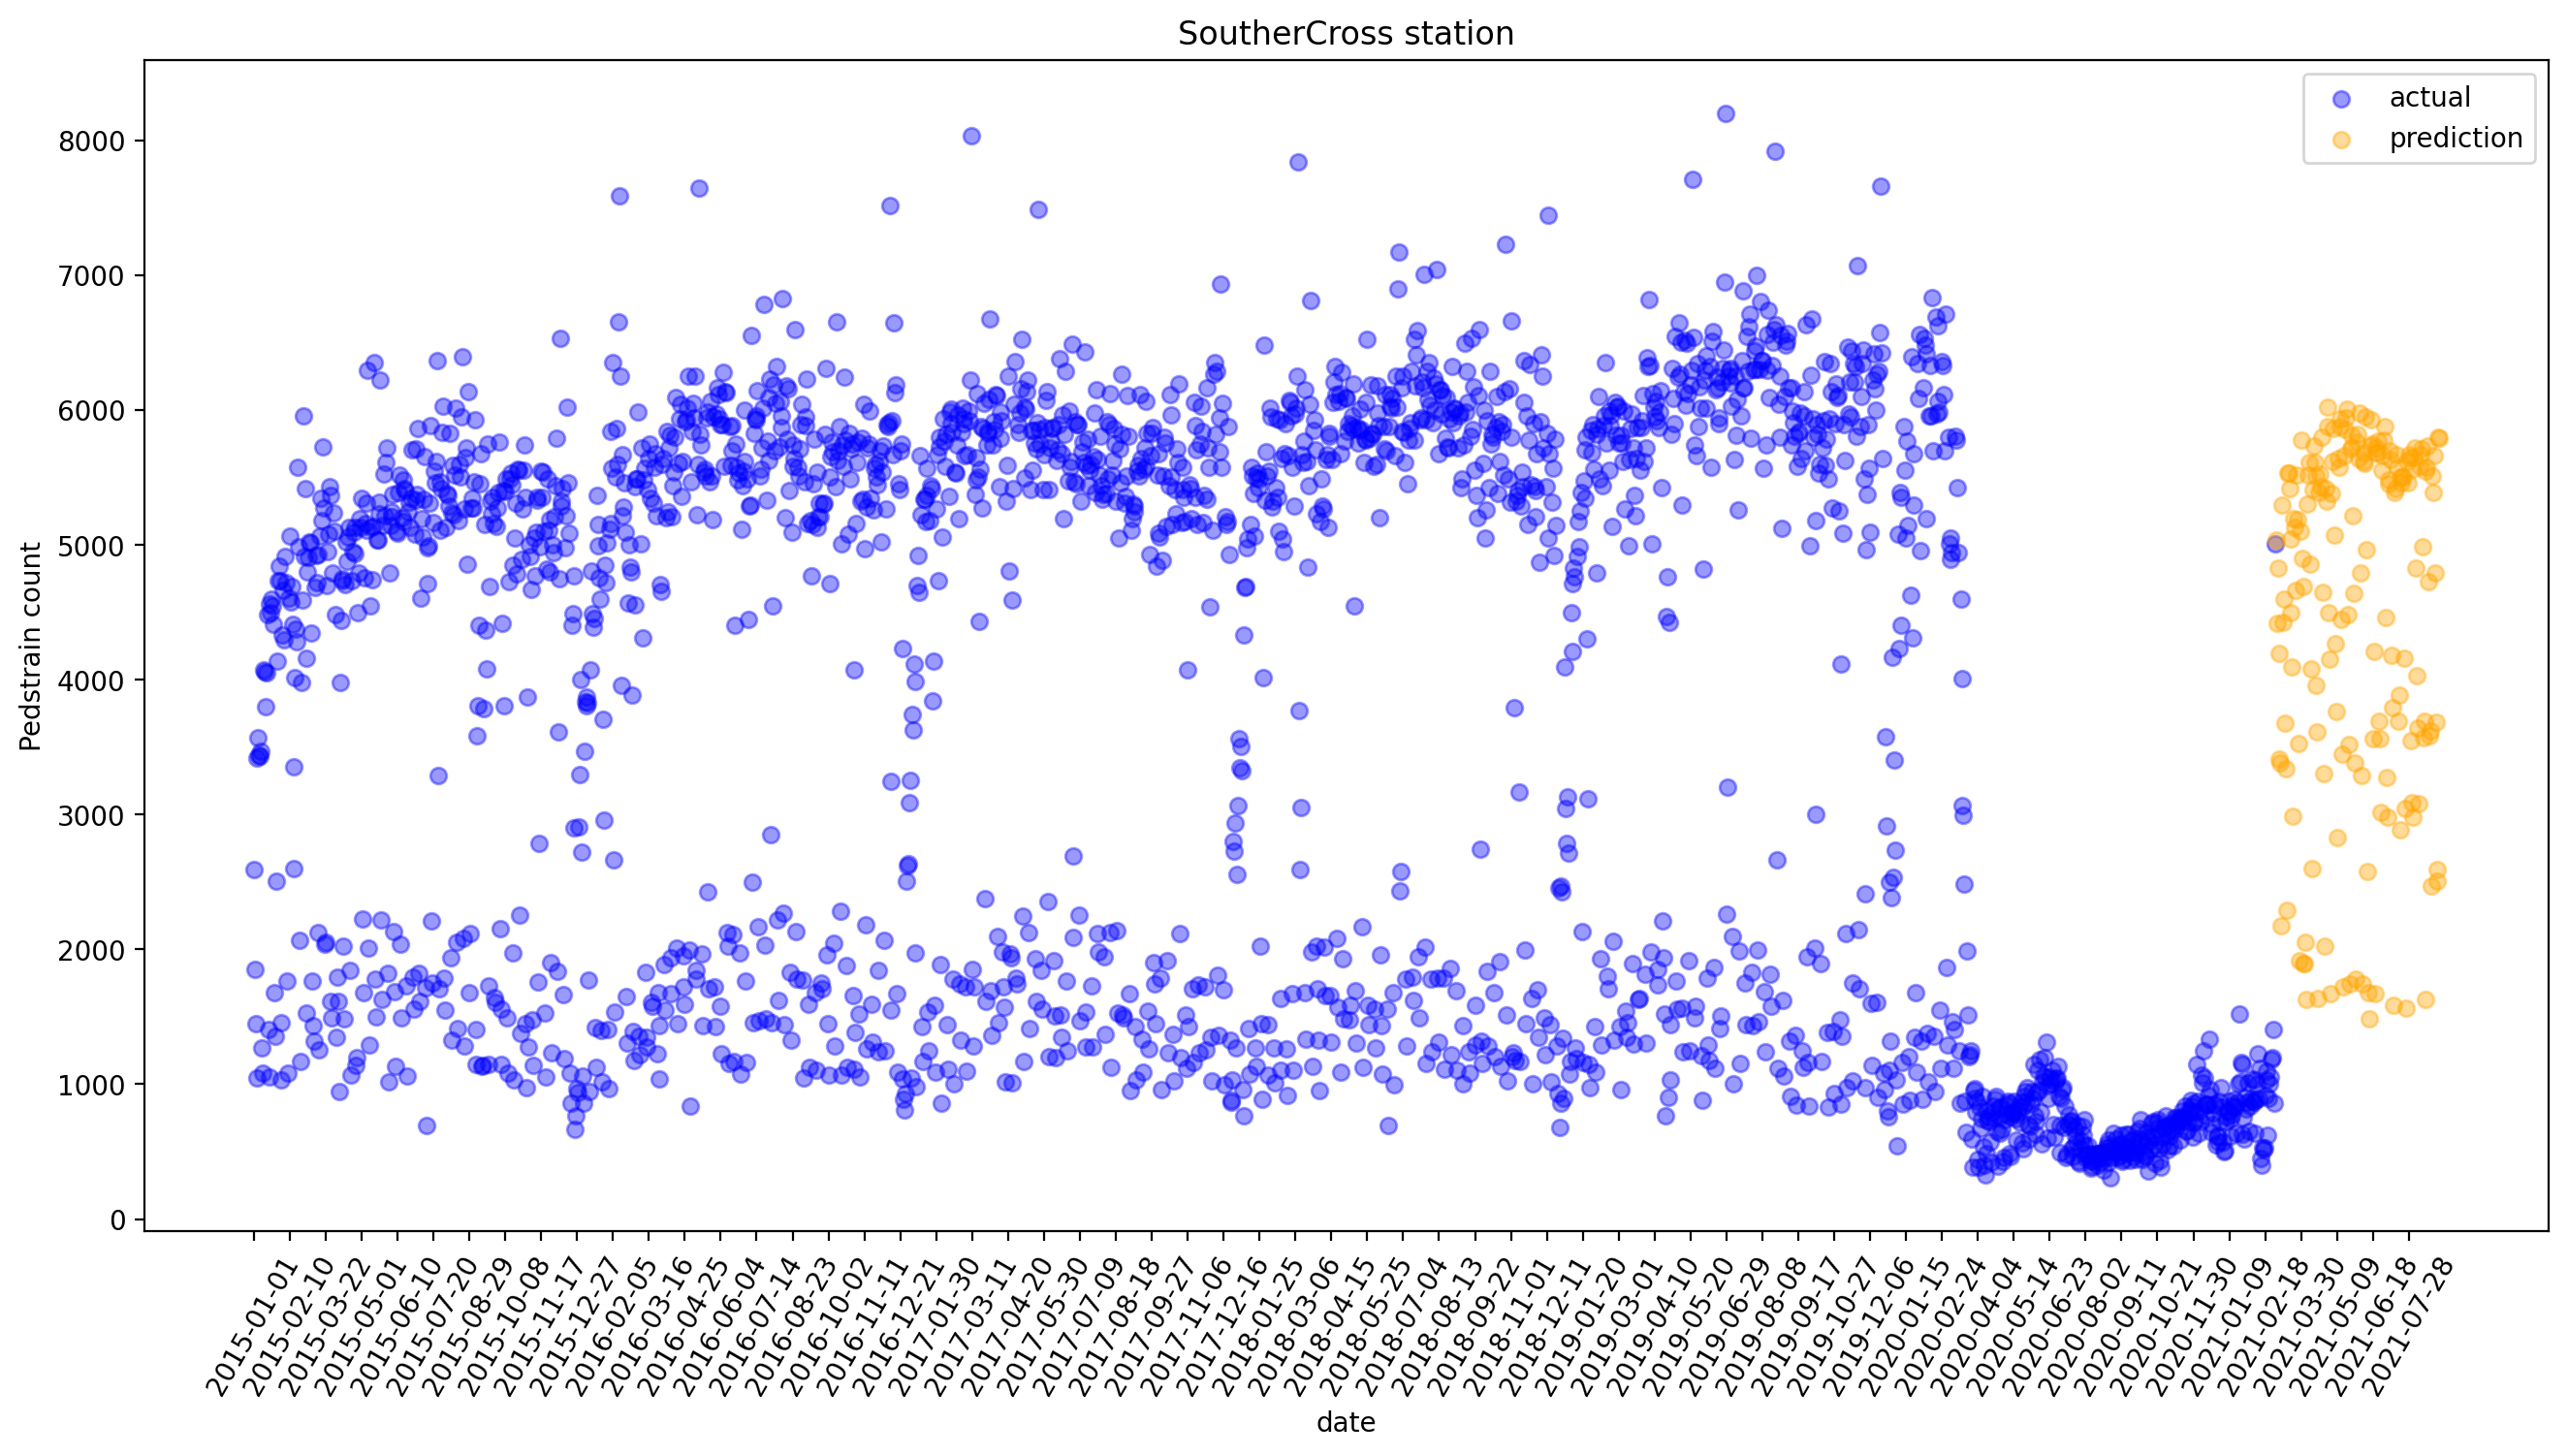

In [74]:
fig , ax = plt.subplots(dpi=200, figsize = (16,8))
ax.scatter(range(2252), result['SouthernCrossCount'][:2252], color = 'blue', alpha=0.4)
ax.scatter(range(2252,2435), result['SouthernCrossCount'][2252:], color = 'orange', alpha=0.4)
ax.set_xticks(range(0,2435,40))
ax.set_xticklabels(result.date_new[::40], rotation =60);
ax.set_xlabel('date')

ax.set_ylabel('Pedstrain count')
ax.set_title('SoutherCross station')
ax.legend(['actual','prediction'])
plt.savefig('Southern.png')




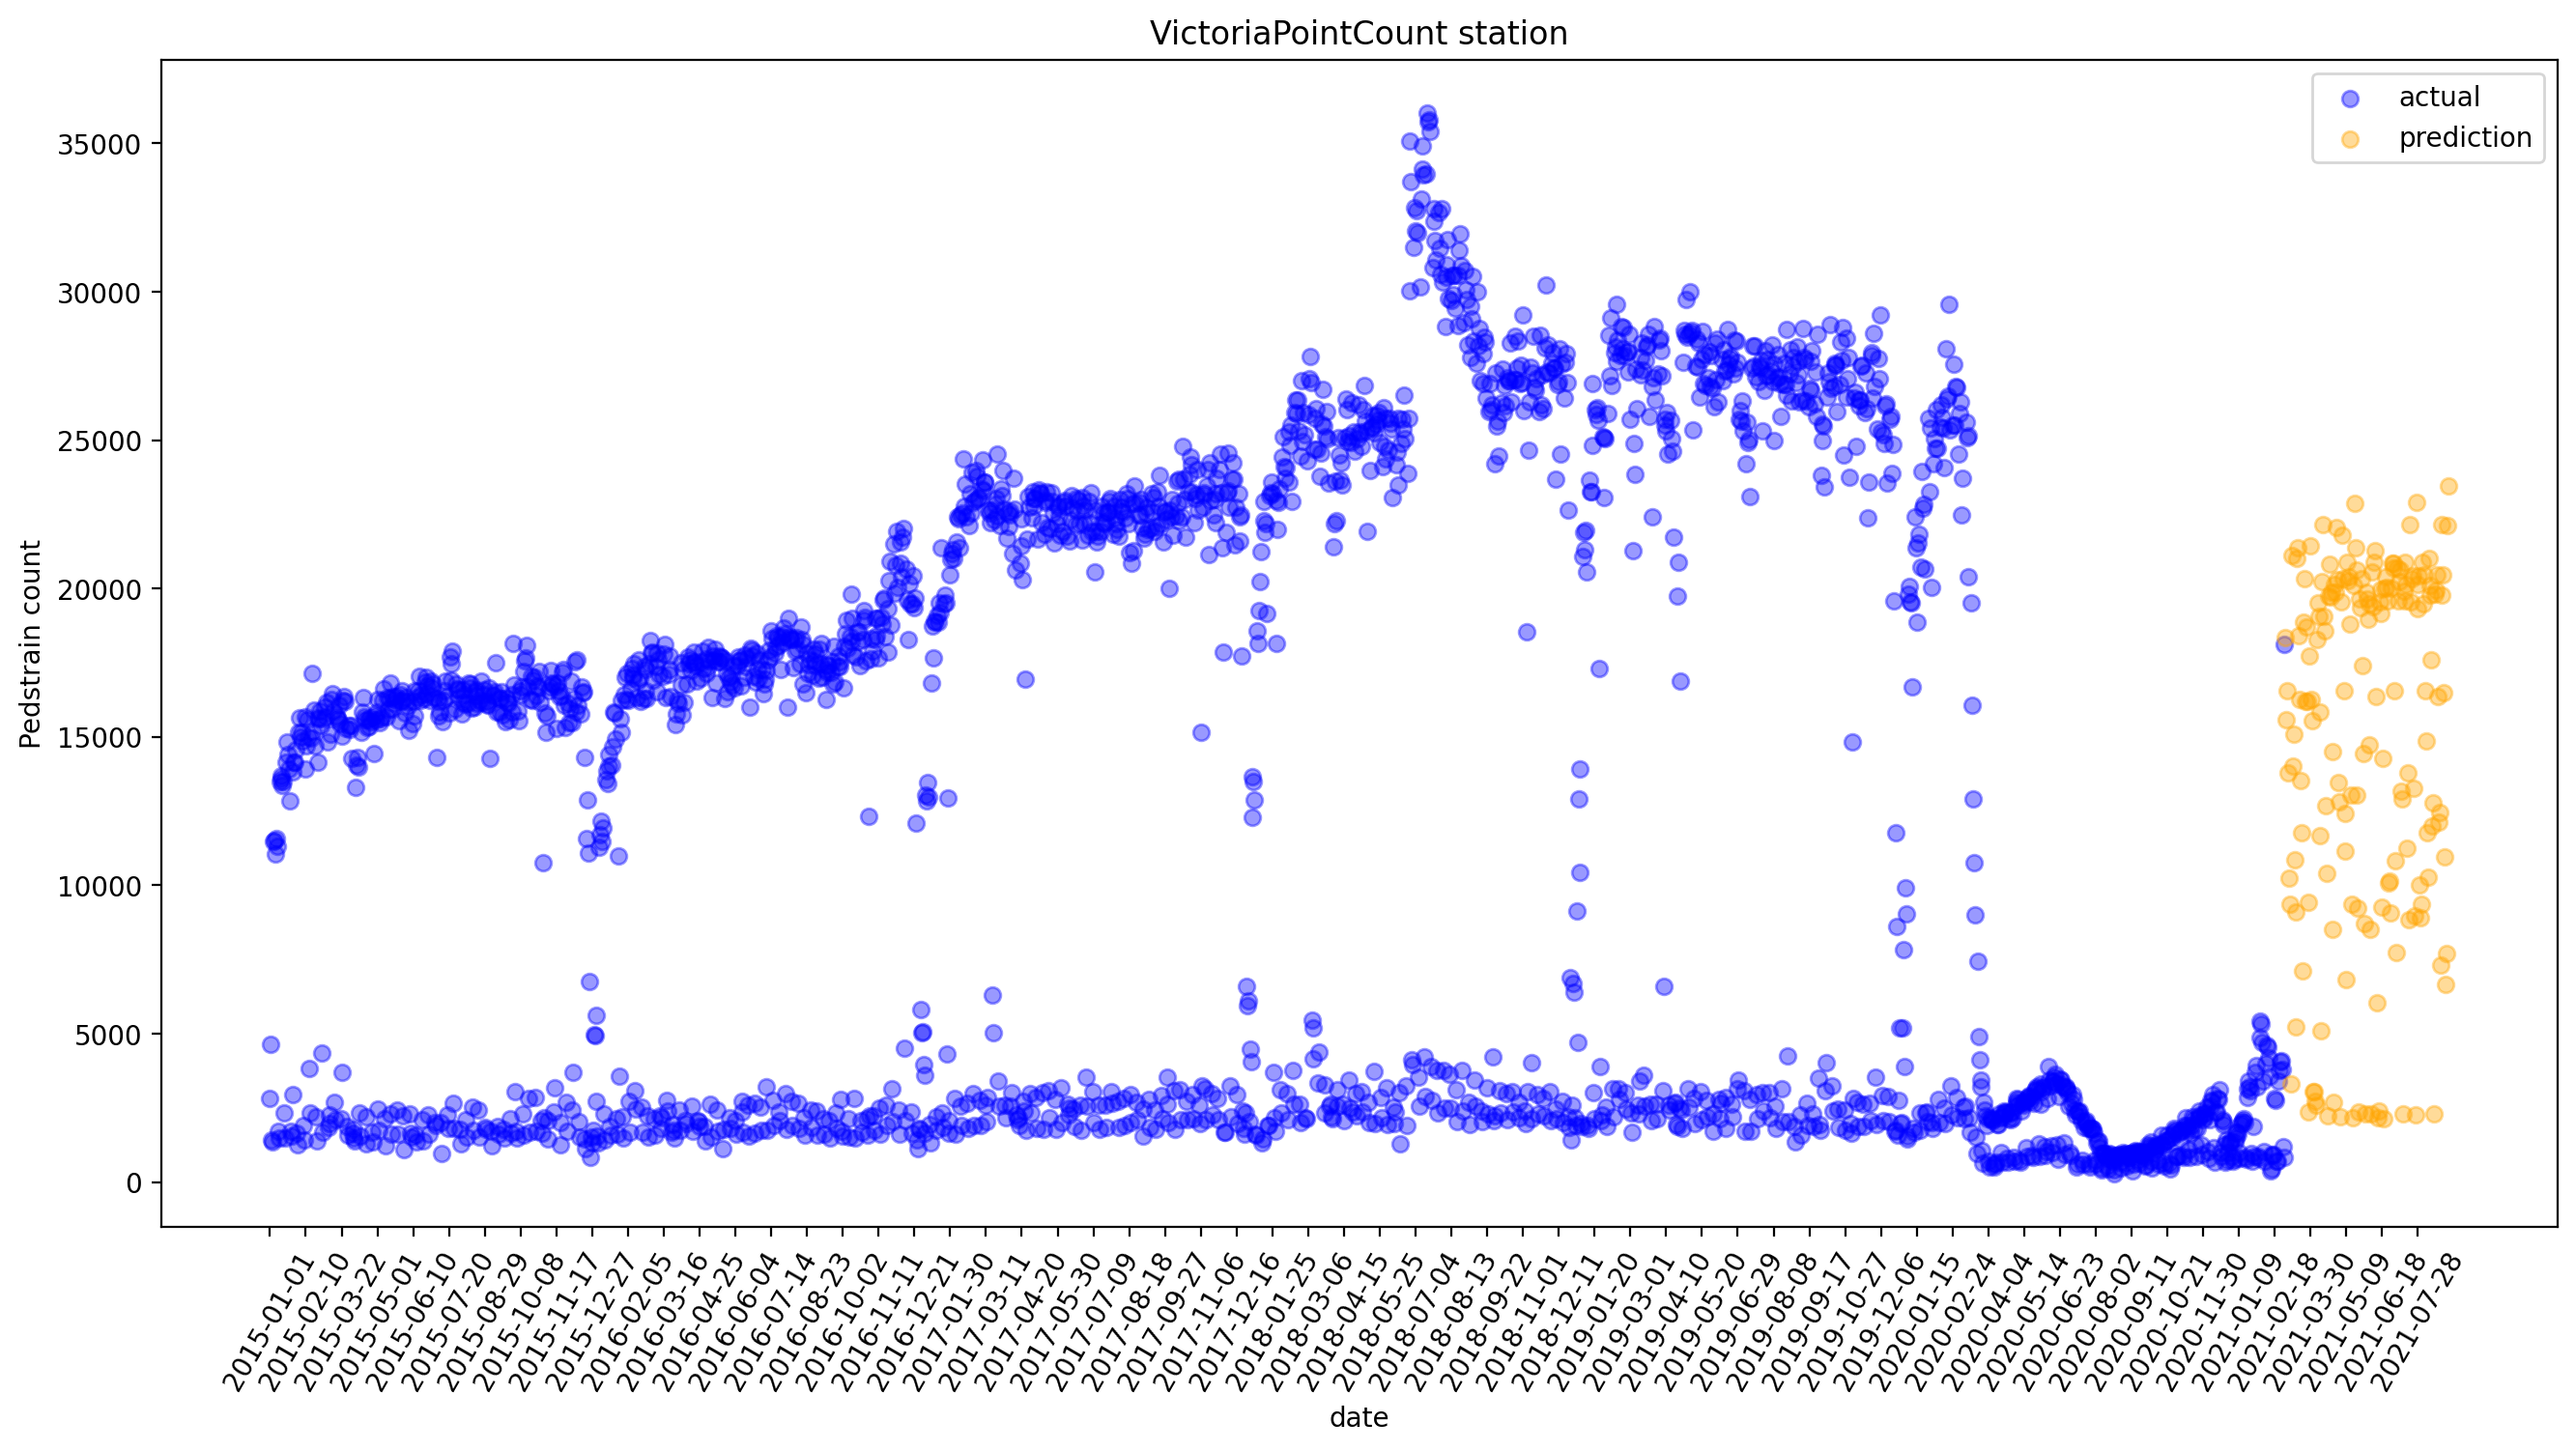

In [75]:
fig , ax = plt.subplots(dpi=200, figsize = (16,8))
ax.scatter(range(2252), result['VictoriaPointCount'][:2252], color = 'blue', alpha=0.4)
ax.scatter(range(2252,2435), result['VictoriaPointCount'][2252:], color = 'orange', alpha=0.4)
ax.set_xticks(range(0,2435,40))
ax.set_xticklabels(result.date_new[::40], rotation =60);
ax.set_xlabel('date')

ax.set_ylabel('Pedstrain count')
ax.set_title('VictoriaPointCount station')
ax.legend(['actual','prediction'])
plt.savefig('Victoria.png')

In [246]:
result.to_csv('Southern_VIC_prediciton.csv', index = False)

date_new                                2021-02-28
year                                          2021
dayofyear                                       59
dayofweek                                        7
month                                            2
Public Holiday?                                  0
Min                                           10.6
Max                                           26.7
Daily global solar exposure (MJ/m*m)          23.3
Rainfall amount (millimetres)                  0.0
SouthernCrossCount                           861.0
VictoriaPointCount                           826.0
Class                                       actual
Name: 2250, dtype: object